In [115]:
import cPickle
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import operator
import pandas.io.data as web
from sklearn.qda import QDA
import re
from dateutil import parser
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
#below are the indices were pulling
#nasdaq, djia, frankfurt, london, paris, hkong, nikkei, australia,spain,world,russian

nasdaq=web.DataReader(name='^IXIC',data_source='yahoo',start='2012-1-1')

nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1141 entries, 2012-01-03 to 2016-07-15
Data columns (total 6 columns):
Open         1141 non-null float64
High         1141 non-null float64
Low          1141 non-null float64
Close        1141 non-null float64
Volume       1141 non-null int64
Adj Close    1141 non-null float64
dtypes: float64(5), int64(1)
memory usage: 62.4 KB


In [160]:
SPX=web.DataReader(name='^GSPC',data_source='yahoo',start='2016-1-1')
SPX.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,4304880000,2012.660034
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966
2016-01-08,1985.319946,1985.319946,1918.459961,1922.030029,4664940000,1922.030029


In [118]:
nasdaq.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-11,4976.540039,5002.500000,4976.540039,4988.640137,1718450000,4988.640137
2016-07-12,5017.990234,5032.100098,5009.680176,5022.819824,1866280000,5022.819824
2016-07-13,5036.319824,5036.379883,5002.819824,5005.729980,1650820000,5005.729980
2016-07-14,5041.950195,5045.180176,5025.149902,5034.060059,1641170000,5034.060059
2016-07-15,5041.189941,5044.810059,5018.520020,5029.589844,1610300000,5029.589844


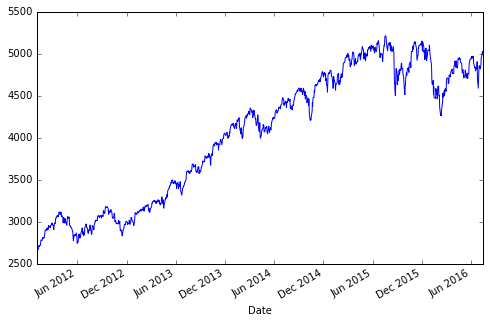

In [119]:
#Get an Idea
#Plot adjusted close to seee how the price has moved. 
nasdaq['Adj Close'].plot(figsize=(8,5))

In [120]:
#Look at percent return

nasdaq['Perc_Change']= (nasdaq['Close']).pct_change()


In [121]:
nasdaq[['Close','Perc_Change']].tail()

,Close,Perc_Change
Date,,
2016-07-11,4988.640137,0.006432
2016-07-12,5022.819824,0.006852
2016-07-13,5005.729980,-0.003402
2016-07-14,5034.060059,0.005660
2016-07-15,5029.589844,-0.000888


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117f97790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119078850>], dtype=object)

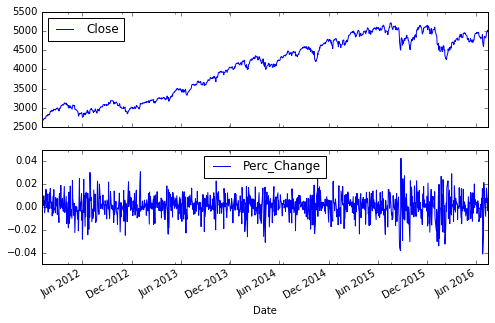

In [122]:
#Plot Close and Percent Change
nasdaq[['Close','Perc_Change']].plot(subplots=True,style='b',figsize=(8,5))


In [166]:
#turn into a function
#only need to keep Close and Perc_Change
def getWebData(symbol,start,end):
    df= web.DataReader(name=symbol,data_source='yahoo',start=start,end=end)
    df.columns.values[-1] = 'AdjClose'
    df.columns = df.columns + '_' + symbol
    df['Return_%s' %symbol] = df['AdjClose_%s' %symbol].pct_change()
    df=df[['AdjClose_%s' %symbol,'Return_%s' %symbol]]
    return df

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119b8e690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119c53890>], dtype=object)

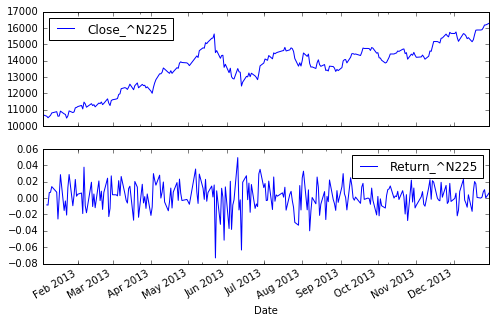

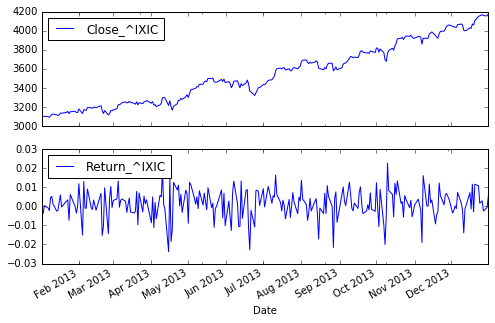

In [124]:
#check work
df_nikkei=getWebData('^N225','2013-1-1','2013-12-31')
df_nasdaq=getWebData('^IXIC','2013-1-1','2013-12-31')

df_nikkei.plot(subplots=True,style='b',figsize=(8,5))
df_nasdaq.plot(subplots=True,style='b',figsize=(8,5))

The function below grabs all the variabls/indices I chose to represent/predict the market. I decided to add a high yield treasure bond indice because there is a known belief that high correlation exists between high yield bonds and the S&P500. The rest represent major markets throughout the world that have close ties to the U.S. stock market. 

In [167]:
def getAllStockData(output,start_string, end_string):
    start = parser.parse(start_string)
    end = parser.parse(end_string)
    
    nasdaq = getWebData('^IXIC', start, end)
    frankfurt = getWebData('^GDAXI', start, end)
    london = getWebData('^FTSE', start, end)
    paris = getWebData('^FCHI', start, end)
    spain = getWebData('^IBEX', start, end)
    hkong = getWebData('^HSI', start, end)
    nikkei = getWebData('^N225', start, end)
    australia = getWebData('^AXJO', start, end)
    russian = getWebData('^MCX', start, end)
    djia = getWebData('^DJI', start, end)
    bond= getWebData('JNK',start,end)
    
    out =  getWebData(output, start, end)
    out.columns.values[-1] = 'AdjClose'
    out.columns = out.columns + '_Out'
    out['Return_Out'] = out['AdjClose_Out'].pct_change()
    frames=[nasdaq, djia, frankfurt, london, paris, hkong, nikkei, australia,spain,russian,bond]
    
    return frames

In [168]:
getAllStockData('^GSPC','2016-1-1','2016-3-1')

[            AdjClose_^IXIC  Return_^IXIC
 Date                                    
 2016-01-04     4903.089844           NaN
 2016-01-05     4891.430176     -0.002378
 2016-01-06     4835.759766     -0.011381
 2016-01-07     4689.430176     -0.030260
 2016-01-08     4643.629883     -0.009767
 2016-01-11     4637.990234     -0.001214
 2016-01-12     4685.919922      0.010334
 2016-01-13     4526.060059     -0.034115
 2016-01-14     4615.000000      0.019651
 2016-01-15     4488.419922     -0.027428
 2016-01-19     4476.950195     -0.002555
 2016-01-20     4471.689941     -0.001175
 2016-01-21     4472.060059      0.000083
 2016-01-22     4591.180176      0.026637
 2016-01-25     4518.490234     -0.015833
 2016-01-26     4567.669922      0.010884
 2016-01-27     4468.169922     -0.021784
 2016-01-28     4506.680176      0.008619
 2016-01-29     4613.950195      0.023802
 2016-02-01     4620.370117      0.001391
 2016-02-02     4516.950195     -0.022383
 2016-02-03     4504.240234     -0